In [1]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np

def load_net_to_graphtool(file_path):
    g = Graph(directed=False)
    v_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        reading_edges = False
        for line in lines:
            line = line.strip()
            if line.lower().startswith("*edges"):
                reading_edges = True
                continue
            if not reading_edges:
                continue
            parts = line.split()
            if len(parts) >= 2:
                u, v = int(parts[0]), int(parts[1])
                for node in [u, v]:
                    if node not in v_map:
                        v_map[node] = g.add_vertex()
                g.add_edge(v_map[u], v_map[v])
    return g

def analyze_graph(g, label=None):
    degs = g.get_total_degrees(g.get_vertices())
    print(f"📊 网络：{label}")
    print(f"- 节点数: {g.num_vertices()}")
    print(f"- 边数: {g.num_edges()}")
    print(f"- 平均度数: {np.mean(degs):.2f}")
    print(f"- 最大度数: {np.max(degs)}")
    print(f"- 最小度数: {np.min(degs)}")
    print("-" * 40)

    # 绘制度分布
    degree_count = np.bincount(degs)
    x = np.arange(len(degree_count))
    y = degree_count
    plt.plot(x, y, marker='o', label=label)


file_paths = [
    "c4ring_filtered_network.net",
    "tokyo_pop_1000_gg.net",
    "tokyo_pop_1000_rng.net"
]

for path in file_paths:
    g = load_net_to_graphtool(path)
    analyze_graph(g, label=path.split("/")[-1])

plt.xlabel("度数")
plt.ylabel("节点数")
plt.legend()
plt.grid(True)
plt.show()


📊 网络：c4ring_filtered_network.net
- 节点数: 253251
- 边数: 257691
- 平均度数: 2.04
- 最大度数: 9
- 最小度数: 1
----------------------------------------


TypeError: Cannot cast array data from dtype('uint64') to dtype('int64') according to the rule 'safe'

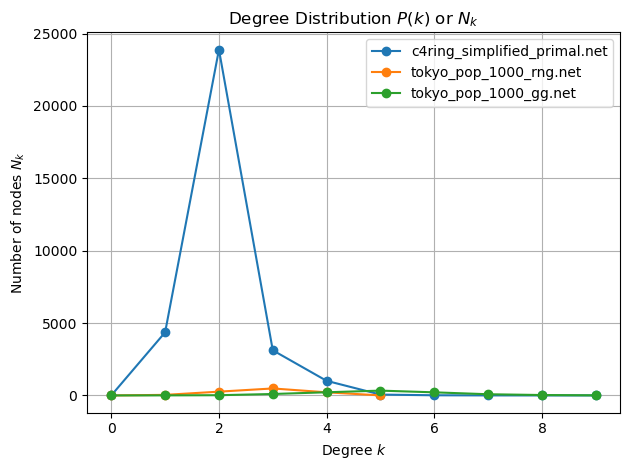

,N (vertices),E (edges),⟨k⟩ (avg degree),k_max,k_min
Network,,,,,
c4ring_simplified_primal.net,32454,32960,2.030000,9,1
tokyo_pop_1000_rng.net,1000,1441,2.880000,5,1
tokyo_pop_1000_gg.net,1000,2501,5.000000,9,1


In [3]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_net_to_graphtool(file_path):
    g = Graph(directed=False)
    v_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        reading_edges = False
        for line in lines:
            line = line.strip()
            if line.lower().startswith("*edges"):
                reading_edges = True
                continue
            if not reading_edges:
                continue
            parts = line.split()
            if len(parts) >= 2:
                u, v = int(parts[0]), int(parts[1])
                for node in [u, v]:
                    if node not in v_map:
                        v_map[node] = g.add_vertex()
                g.add_edge(v_map[u], v_map[v])
    return g

def analyze_graph(g, label=None, normalize=False):
    degs = g.get_total_degrees(g.get_vertices()).astype(int)
    degree_count = np.bincount(degs)
    x = np.arange(len(degree_count))
    y = degree_count

    if normalize:
        y = y / y.sum()

    plt.plot(x, y, marker='o', label=label)

    stats = {
        "Network": label,
        "N (vertices)": g.num_vertices(),
        "E (edges)": g.num_edges(),
        "⟨k⟩ (avg degree)": round(np.mean(degs), 2),
        "k_max": np.max(degs),
        "k_min": np.min(degs)
    }

    return stats

# 你的网络文件路径
file_paths = [
    "c4ring_simplified_primal.net",
    "tokyo_pop_1000_rng.net",
    "tokyo_pop_1000_gg.net"
]

results = []
for path in file_paths:
    g = load_net_to_graphtool(path)
    stats = analyze_graph(g, label=path.split("/")[-1], normalize=False)
    results.append(stats)

# 绘图
plt.xlabel("Degree $k$")
plt.ylabel("Number of nodes $N_k$")
plt.title("Degree Distribution $P(k)$ or $N_k$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出表格
df = pd.DataFrame(results)
df.set_index("Network", inplace=True)
df.style.set_caption("Network Structure Summary (Notation: N, E, k, ⟨k⟩)")


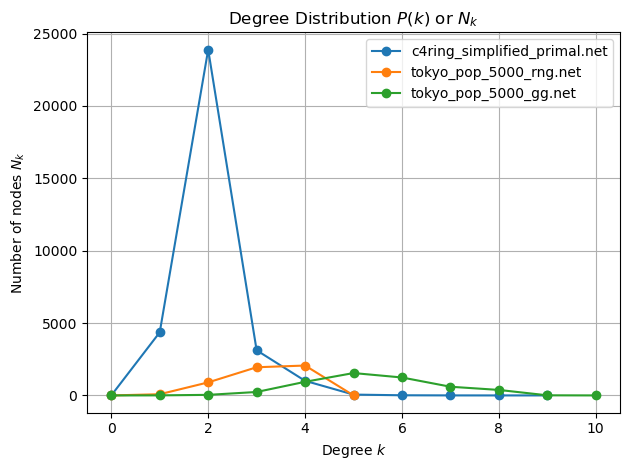

,N (vertices),E (edges),⟨k⟩ (avg degree),k_max,k_min
Network,,,,,
c4ring_simplified_primal.net,32454,32960,2.030000,9,1
tokyo_pop_5000_rng.net,5000,8003,3.200000,5,1
tokyo_pop_5000_gg.net,5000,13531,5.410000,10,1


In [4]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_net_to_graphtool(file_path):
    g = Graph(directed=False)
    v_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        reading_edges = False
        for line in lines:
            line = line.strip()
            if line.lower().startswith("*edges"):
                reading_edges = True
                continue
            if not reading_edges:
                continue
            parts = line.split()
            if len(parts) >= 2:
                u, v = int(parts[0]), int(parts[1])
                for node in [u, v]:
                    if node not in v_map:
                        v_map[node] = g.add_vertex()
                g.add_edge(v_map[u], v_map[v])
    return g


def analyze_graph(g, label=None, normalize=False):
    degs = g.get_total_degrees(g.get_vertices()).astype(int)
    degree_count = np.bincount(degs)
    x = np.arange(len(degree_count))
    y = degree_count

    if normalize:
        y = y / y.sum()

    plt.plot(x, y, marker='o', label=label)

    stats = {
        "Network": label,
        "N (vertices)": g.num_vertices(),
        "E (edges)": g.num_edges(),
        "⟨k⟩ (avg degree)": round(np.mean(degs), 2),
        "k_max": np.max(degs),
        "k_min": np.min(degs)
    }

    return stats


# 你的网络文件路径
file_paths = [
    "c4ring_simplified_primal.net",
    "tokyo_pop_5000_rng.net",
    "tokyo_pop_5000_gg.net"
]

results = []
for path in file_paths:
    g = load_net_to_graphtool(path)
    stats = analyze_graph(g, label=path.split("/")[-1], normalize=False)
    results.append(stats)

# 绘图
plt.xlabel("Degree $k$")
plt.ylabel("Number of nodes $N_k$")
plt.title("Degree Distribution $P(k)$ or $N_k$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出表格
df = pd.DataFrame(results)
df.set_index("Network", inplace=True)
df.style.set_caption("Network Structure Summary (Notation: N, E, k, ⟨k⟩)")


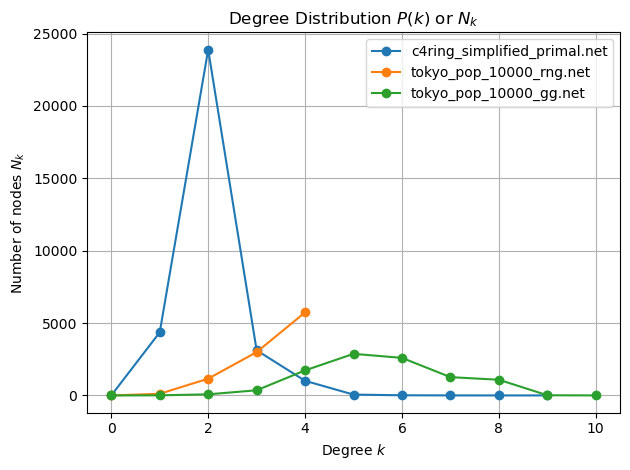

,N (vertices),E (edges),⟨k⟩ (avg degree),k_max,k_min
Network,,,,,
c4ring_simplified_primal.net,32454,32960,2.030000,9,1
tokyo_pop_10000_rng.net,10000,17176,3.440000,4,1
tokyo_pop_10000_gg.net,10000,27863,5.570000,10,1


In [5]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_net_to_graphtool(file_path):
    g = Graph(directed=False)
    v_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        reading_edges = False
        for line in lines:
            line = line.strip()
            if line.lower().startswith("*edges"):
                reading_edges = True
                continue
            if not reading_edges:
                continue
            parts = line.split()
            if len(parts) >= 2:
                u, v = int(parts[0]), int(parts[1])
                for node in [u, v]:
                    if node not in v_map:
                        v_map[node] = g.add_vertex()
                g.add_edge(v_map[u], v_map[v])
    return g


def analyze_graph(g, label=None, normalize=False):
    degs = g.get_total_degrees(g.get_vertices()).astype(int)
    degree_count = np.bincount(degs)
    x = np.arange(len(degree_count))
    y = degree_count

    if normalize:
        y = y / y.sum()

    plt.plot(x, y, marker='o', label=label)

    stats = {
        "Network": label,
        "N (vertices)": g.num_vertices(),
        "E (edges)": g.num_edges(),
        "⟨k⟩ (avg degree)": round(np.mean(degs), 2),
        "k_max": np.max(degs),
        "k_min": np.min(degs)
    }

    return stats


# 你的网络文件路径
file_paths = [
    "c4ring_simplified_primal.net",
    "tokyo_pop_10000_rng.net",
    "tokyo_pop_10000_gg.net"
]

results = []
for path in file_paths:
    g = load_net_to_graphtool(path)
    stats = analyze_graph(g, label=path.split("/")[-1], normalize=False)
    results.append(stats)

# 绘图
plt.xlabel("Degree $k$")
plt.ylabel("Number of nodes $N_k$")
plt.title("Degree Distribution $P(k)$ or $N_k$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出表格
df = pd.DataFrame(results)
df.set_index("Network", inplace=True)
df.style.set_caption("Network Structure Summary (Notation: N, E, k, ⟨k⟩)")


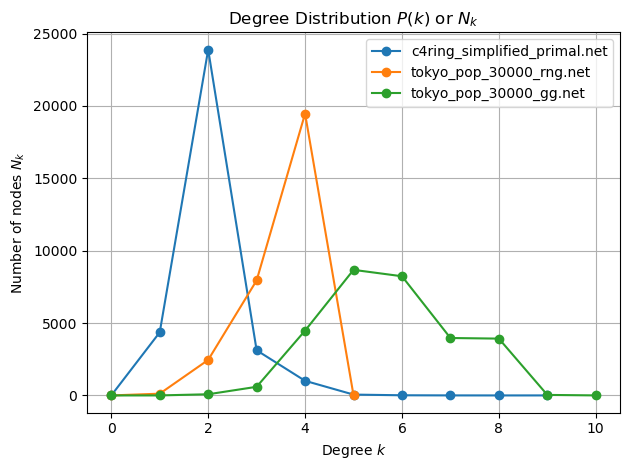

,N (vertices),E (edges),⟨k⟩ (avg degree),k_max,k_min
Network,,,,,
c4ring_simplified_primal.net,32454,32960,2.030000,9,1
tokyo_pop_30000_rng.net,30000,53397,3.560000,5,1
tokyo_pop_30000_gg.net,30000,86093,5.740000,10,1


In [6]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def load_net_to_graphtool(file_path):
    g = Graph(directed=False)
    v_map = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        reading_edges = False
        for line in lines:
            line = line.strip()
            if line.lower().startswith("*edges"):
                reading_edges = True
                continue
            if not reading_edges:
                continue
            parts = line.split()
            if len(parts) >= 2:
                u, v = int(parts[0]), int(parts[1])
                for node in [u, v]:
                    if node not in v_map:
                        v_map[node] = g.add_vertex()
                g.add_edge(v_map[u], v_map[v])
    return g


def analyze_graph(g, label=None, normalize=False):
    degs = g.get_total_degrees(g.get_vertices()).astype(int)
    degree_count = np.bincount(degs)
    x = np.arange(len(degree_count))
    y = degree_count

    if normalize:
        y = y / y.sum()

    plt.plot(x, y, marker='o', label=label)

    stats = {
        "Network": label,
        "N (vertices)": g.num_vertices(),
        "E (edges)": g.num_edges(),
        "⟨k⟩ (avg degree)": round(np.mean(degs), 2),
        "k_max": np.max(degs),
        "k_min": np.min(degs)
    }

    return stats


# 你的网络文件路径
file_paths = [
    "c4ring_simplified_primal.net",
    "tokyo_pop_30000_rng.net",
    "tokyo_pop_30000_gg.net"
]

results = []
for path in file_paths:
    g = load_net_to_graphtool(path)
    stats = analyze_graph(g, label=path.split("/")[-1], normalize=False)
    results.append(stats)

# 绘图
plt.xlabel("Degree $k$")
plt.ylabel("Number of nodes $N_k$")
plt.title("Degree Distribution $P(k)$ or $N_k$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出表格
df = pd.DataFrame(results)
df.set_index("Network", inplace=True)
df.style.set_caption("Network Structure Summary (Notation: N, E, k, ⟨k⟩)")
